<a href="https://colab.research.google.com/github/SergeevaAI/Platforms_Data_Sciense/blob/main/05_exercise_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%D0%B0_%D0%90%D0%BD%D0%B0%D1%81%D1%82%D0%B0%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Номер варианта: 14**

**Задание 1**

Реализовать графики в Altair с использованием следующих ключей:

# 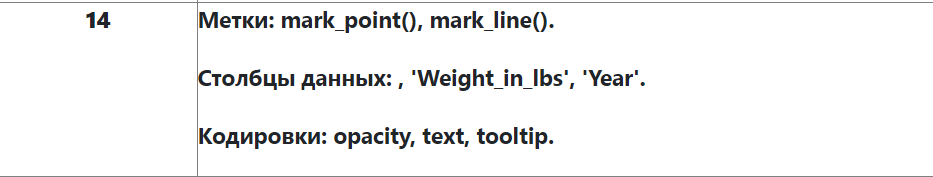

Импорт библиотеки Altair.

In [33]:
import altair as alt

Использование пакета vega_datasets, чтобы загрузить набор данных: о машинах.

In [34]:
from vega_datasets import data

cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Построим диаграмму для набора данных с метками (вес в футах по годам), возьмем за x=Weight_in_lbs, y=Year. Добавим точечной диаграмме интерактивности с возможностью масштабировать.

In [10]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs'
).interactive()

alt.Chart(...)

Нам даны данные с 1970 по 1982 годы, при этом за 1981 данных нет. С каждым годом вес машин падает.

А теперь попробуем изменить уровень прозрачности графика, чтобы сделать остальные значения, которые накладываются друг на друга, более заметными.

In [11]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs',
    opacity=alt.value(0.5)
).interactive()

alt.Chart(...)

Можем добавить подсказку, чтобы увидеть точное значение веса.

In [12]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs',
    opacity=alt.value(0.5),
    tooltip='Weight_in_lbs'
).interactive()

alt.Chart(...)

In [13]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs',
    opacity=alt.value(0.5),
    tooltip='Weight_in_lbs',
).interactive()

alt.Chart(...)

А теперь строим линейный график

In [19]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='Weight_in_lbs'
).interactive()

alt.Chart(...)

Также меняем прозрачность, только сделаем на этот раз его наоборот ярче.

In [20]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='Weight_in_lbs',
    opacity=alt.value(0.8)
).interactive()

alt.Chart(...)

График с метками значений веса машин интерактивен, поэтому при увеличении графика значения уже не накладываются друг на друга и можно посмотреть по каждой точке.

In [27]:
text = alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs'
).interactive().mark_text(
    align='left',
    baseline='bottom',
).encode(
    text='Weight_in_lbs',
    x='Year',
    y='Weight_in_lbs'
)
text

alt.Chart(...)

Отдельно отображены текстовые метки, теперь можно объединить их с другими графиками.

In [30]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='Weight_in_lbs'
).interactive() + text + alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs'
).interactive()

alt.LayerChart(...)

**Задание 2**

Используя данные об автомобилях, создайте диаграмму рассеяния (*scatter-plot*), на которой *размер* (*size*) точек становится больше при наведении на них курсора.

Обратимся к графику из первого задания и включим наше условие.

In [31]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs',
    opacity=alt.value(0.5),
    tooltip='Weight_in_lbs',
).interactive()

alt.Chart(...)

Размер при наведении 50, а по умолчанию 20, зададим условие по наведению мыши и добавим фильтрацию по цвету.

In [38]:
single = alt.selection_single(on='mouseover', nearest=True)

alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Weight_in_lbs',
    opacity=alt.value(0.5),
    tooltip='Weight_in_lbs',
    color='Origin',
    size=alt.condition(
        single,
        alt.value(100),
        alt.value(20))).add_selection(
    single
).interactive()

alt.Chart(...)

**Задание 3**

Используя данные об автомобилях, создайте двухпанельную (*two-panel*) гистограмму (количество миль на галлон на одной панели, количество лошадиных сил на другой), где вы можете перетащить мышь, чтобы выбрать данные на левой панели, чтобы отфильтровать данные на второй панели.

Гистограмма для количества миль на галлон.

In [41]:
mpg=alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    alt.Y('count()'),
)
mpg

alt.Chart(...)

Гистограмма для количества лошадиных сил.

In [47]:
horsepower=alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('count()'),
)
horsepower

alt.Chart(...)

Задаём для фильтра и выбора интервала, включаем в графики и объединяем, также фильтрация по стране.

In [54]:
interval = alt.selection_interval()

mpg=alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    alt.Y('count()'),
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).add_selection(
    interval
)

horsepower=alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('count()'),
        color='Origin'
).transform_filter(
    interval
)

mpg | horsepower

alt.HConcatChart(...)

Если брать для лидируещего количества миль (15-20), то больше всего по количеству лошадиных сил в этом диапозоне 100-120. При этом меньше всего количества миль в диапазоне 5-10 (Америка, 180-200 лошадиных сил) и 45-50 (Япония, 60-70 лошадиных сил).

**Задание 4**

Измените пример диаграммы разброса и гистограммы, чтобы

- панорамировать и увеличивать диаграмму рассеяния;
- гистограмма отражала только те точки, которые видны в данный момент.

Меняем первую гистограмму из предыдущего примера на диаграмму разброса.

In [60]:
interval = alt.selection_interval()

mpg = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='count()',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).add_selection(
    interval
)

horsepower=alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('count()'),
        color='Origin'
).transform_filter(
    interval
)

mpg | horsepower

alt.HConcatChart(...)

Добавим интерактивность.

In [59]:
interval = alt.selection_interval()

mpg = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='count()',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).add_selection(
    interval
).interactive()

horsepower=alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('count()'),
        color='Origin'
).transform_filter(
    interval
)

mpg | horsepower

alt.HConcatChart(...)

**Задание 5**

Создайте диаграмму на основе самостоятельно сгенерированных данных и постройте кривые синуса и косинуса с помощью `transform_calculate`.

Вариант 14:

x = pd.DataFrame({'x': np.linspace(-len(Отчество), len(Фамилия))})

Генерация данных.

In [63]:
# Импортируем нужные нам библиотеки
import pandas as pd
import numpy as np

# Создаем DataFrame с значениями x
x = pd.DataFrame({'x': np.linspace(-len("8"), len("8"))})

x.head()

,x
0,-1.000000
1,-0.959184
2,-0.918367
3,-0.877551
4,-0.836735


Посчитаем синусы и косинусы.

In [72]:
sinandcos = alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
)

Строим графики.

In [75]:
sin1 = sinandcos.mark_line().encode(
    x='x:Q',
    y='sin:Q',
    color=alt.value('red')
)

sin1

alt.Chart(...)

In [76]:
cos1 = sinandcos.mark_line().encode(
    x='x:Q',
    y='cos:Q',
    color=alt.value('blue')
)

cos1

alt.Chart(...)

In [77]:
sin1 + cos1

alt.LayerChart(...)

**Задание 6**

Используйте `transform_filter` на диаграмме задания 4 и удалите области графика, где значение кривой косинуса меньше значения кривой синуса.

In [78]:
sin2 = sin1.transform_filter(
    alt.datum.cos >= alt.datum.sin
)

cos2 = cos1.transform_filter(
    alt.datum.cos >= alt.datum.sin
)

sin2 + cos2

alt.LayerChart(...)

**Задание 7**

Используйте любимую визуализацию из предыдущего упражнения и настройте эстетику графика:


- настроить вид меток (`size`, `strokewidth` и т. д.).

- изменить оси и названия графика.

- изменить пределы `x` и `y`.

Обращаемся к предыдущему значению с графиками синуса и косинуса, как просят.

In [79]:
sin3 = sinandcos.mark_line(
    # Толщина линии
    size=2,
     # Уровень прозрачности
    opacity=0.3,
    # Поменять на пунктирную линию
    strokeDash=[5, 3],
    # Внешний вид концов линии
    strokeCap='round',
    tooltip='cos'
).encode(
    x=alt.X('x:Q', title='Значение X'),
    y=alt.Y('cos:Q', title='Значение Косинуса'),
    color=alt.value('red')
).transform_filter(
    alt.datum.cos >= alt.datum.sin
)

cos3 = sinandcos.mark_line(
    # Толщина линии
    size=3,
     # Уровень прозрачности
    opacity=0.7,
    # Внешний вид концов линии
    tooltip='sin'
).encode(
    x=alt.X('x:Q', title='Значение X'),
    y=alt.Y('sin:Q', title='Значение синуса'),
    color=alt.value('blue')
).transform_filter(
    alt.datum.cos >= alt.datum.sin
)

In [81]:
sin3 + cos3

alt.LayerChart(...)

**Задание 8**

Используйте завершение табуляции в `alt.Chart.configure_`, чтобы увидеть различные параметры конфигурации, затем используйте `?`, чтобы увидеть документацию по функциям.

In [83]:
alt.Chart.configure_point?

In [84]:
alt.Chart.configure_axis?

In [85]:
alt.Chart.configure_bar?

In [86]:
alt.Chart.configure_header?

In [87]:
alt.Chart.configure_legend?

In [88]:
alt.Chart.configure_mark?

In [89]:
alt.Chart.configure_point?

In [90]:
alt.Chart.configure_scale?

In [91]:
alt.Chart.configure_selection?

In [92]:
alt.Chart.configure_title?

In [93]:
alt.Chart.configure_view?